In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import defaultdict
from datetime import datetime, timedelta
%matplotlib inline

In [210]:
# !tail apple_health_export/export.xml

In [235]:
data = defaultdict(list)

with open('apple_health_export/export.xml', 'r') as f:
    for line in f:
        if re.search('^[\s]*<Record ', line):
            for x in re.findall(r'([\w]*)="([\w\.\+\:\-\s]*)"' , line):
                k, v = x
                data[k].append(v)

# add missing unit                
unit = data.pop('unit')
df = pd.DataFrame({x:data[x] for x in data.keys()}, )
df['unit'] = None
df.loc[df.index < len(unit), 'unit'] = unit

# convert datetime daata
df.creationDate  = pd.to_datetime(df.creationDate).apply(lambda x: x.date())
df.startDate = pd.to_datetime(df.startDate)
df.endDate = pd.to_datetime(df.endDate)

# convert value data
# df.value = df.value.astype(float)

df.head()

creationDate             endDate sourceName sourceVersion  \
0   2017-06-04 2017-06-04 14:00:52     Health        10.3.2   
1   2017-06-04 2017-06-04 14:00:52     Health        10.3.2   
2   2017-06-04 2017-06-04 11:58:57     iPhone        10.3.2   
3   2017-06-04 2017-06-04 12:08:56     iPhone        10.3.2   
4   2017-06-04 2017-06-04 12:18:27     iPhone        10.3.2   

            startDate                               type value   unit  
0 2017-06-04 14:00:52     HKQuantityTypeIdentifierHeight   168     cm  
1 2017-06-04 14:00:52   HKQuantityTypeIdentifierBodyMass    73     kg  
2 2017-06-04 11:52:18  HKQuantityTypeIdentifierStepCount    13  count  
3 2017-06-04 11:58:57  HKQuantityTypeIdentifierStepCount   324  count  
4 2017-06-04 12:08:56  HKQuantityTypeIdentifierStepCount   840  count

In [236]:
df2 = df.type.astype(str).str.extract('([\w]*)Identifier([\w]*)')
df2.head()

/home/tam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0          1
0  HKQuantityType     Height
1  HKQuantityType   BodyMass
2  HKQuantityType  StepCount
3  HKQuantityType  StepCount
4  HKQuantityType  StepCount

In [237]:
df['type'] = df2[1].values
df.head()

creationDate             endDate sourceName sourceVersion  \
0   2017-06-04 2017-06-04 14:00:52     Health        10.3.2   
1   2017-06-04 2017-06-04 14:00:52     Health        10.3.2   
2   2017-06-04 2017-06-04 11:58:57     iPhone        10.3.2   
3   2017-06-04 2017-06-04 12:08:56     iPhone        10.3.2   
4   2017-06-04 2017-06-04 12:18:27     iPhone        10.3.2   

            startDate       type value   unit  
0 2017-06-04 14:00:52     Height   168     cm  
1 2017-06-04 14:00:52   BodyMass    73     kg  
2 2017-06-04 11:52:18  StepCount    13  count  
3 2017-06-04 11:58:57  StepCount   324  count  
4 2017-06-04 12:08:56  StepCount   840  count

In [238]:
print df.type.unique()

['Height' 'BodyMass' 'StepCount' 'DistanceWalkingRunning' 'FlightsClimbed'
 'SleepAnalysis']


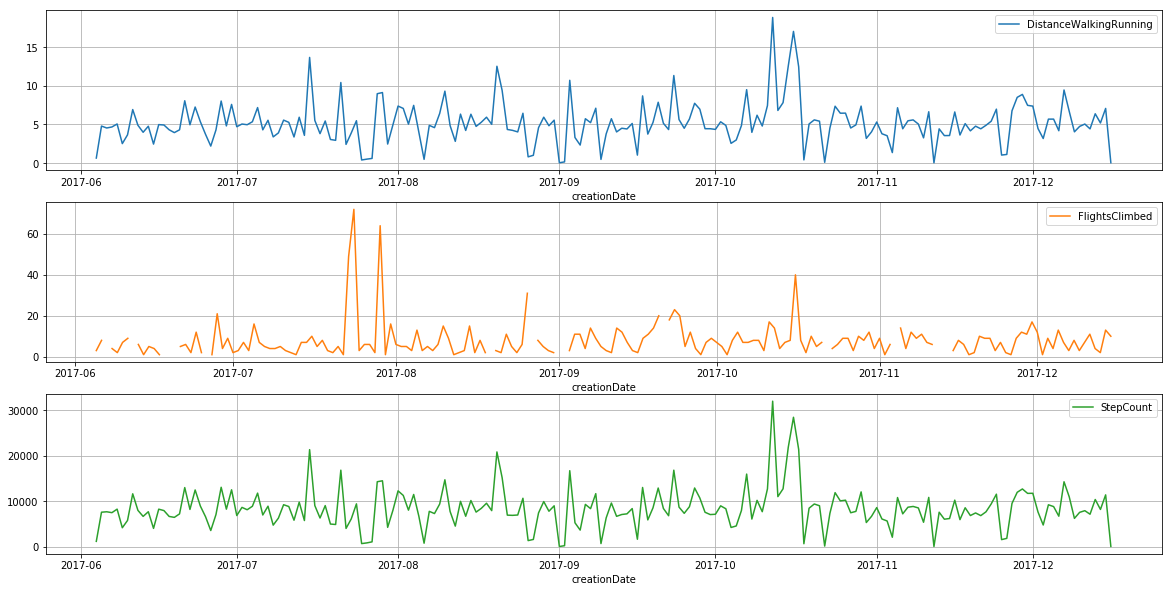

In [249]:
activity_types = ['StepCount', 'DistanceWalkingRunning', 'FlightsClimbed']
df2 = df[df.type.isin(activity_types)]
df2.value = df2.value.astype(float)
df2 = df2.groupby(['creationDate', 'type'])['value'].sum().unstack()
# df2.fillna(0)

fig = plt.figure()
ax = fig.add_subplot(111)
df2.plot(subplots=True, grid=True, ax=ax)
fig.set_size_inches(20, 10)

In [251]:
activity_types = ['StepCount', 'DistanceWalkingRunning', 'FlightsClimbed']
df2 = df[df.type.isin(activity_types)]
df2

creationDate             endDate sourceName sourceVersion  \
2       2017-06-04 2017-06-04 11:58:57     iPhone        10.3.2   
3       2017-06-04 2017-06-04 12:08:56     iPhone        10.3.2   
4       2017-06-04 2017-06-04 12:18:27     iPhone        10.3.2   
5       2017-06-04 2017-06-04 13:58:22     iPhone        10.3.2   
6       2017-06-04 2017-06-04 14:53:15     iPhone        10.3.2   
7       2017-06-05 2017-06-04 23:55:17     iPhone        10.3.2   
8       2017-06-05 2017-06-05 00:12:24     iPhone        10.3.2   
9       2017-06-05 2017-06-05 00:16:24     iPhone        10.3.2   
10      2017-06-05 2017-06-05 00:51:56     iPhone        10.3.2   
11      2017-06-05 2017-06-05 00:54:37     iPhone        10.3.2   
12      2017-06-05 2017-06-05 03:32:54     iPhone        10.3.2   
13      2017-06-05 2017-06-05 03:42:53     iPhone        10.3.2   
14      2017-06-05 2017-06-05 03:44:20     iPhone        10.3.2   
15      2017-06-05 2017-06-05 04:16:05     iPhone        10.3.2   
16      2017-06-05 2017-06-05 04:18:54     iPhone        10.3.2   
17      2017-06-05 2017-06-05 04:45:16     iPhone        10.3.2   
18      2017-06-05 2017-06-05 04:52:54     iPhone        10.3.2   
19      2017-06-05 2017-06-05 09:47:13     iPhone        10.3.2   
20      2017-06-05 2017-06-05 09:57:12     iPhone        10.3.2   
21      2017-06-05 2017-06-05 09:59:35     iPhone        10.3.2   
22      2017-06-05 2017-06-05 10:19:18     iPhone        10.3.2   
23      2017-06-05 2017-06-05 10:26:56     iPhone        10.3.2   
24      2017-06-05 2017-06-05 12:01:20     iPhone        10.3.2   
25      2017-06-05 2017-06-05 12:44:27     iPhone        10.3.2   
26      2017-06-05 2017-06-05 12:54:19     iPhone        10.3.2   
27      2017-06-05 2017-06-05 13:04:10     iPhone        10.3.2   
28      2017-06-05 2017-06-05 13:14:09     iPhone        10.3.2   
29      2017-06-05 2017-06-05 13:24:01     iPhone        10.3.2   
30      2017-06-05 2017-06-05 13:33:58     iPhone        10.3.2   
31      2017-06-05 2017-06-05 13:43:18     iPhone        10.3.2   
...            ...                 ...        ...           ...   
14124   2017-12-11 2017-12-11 12:26:51     iPhone        11.1.2   
14125   2017-12-12 2017-12-12 00:56:05     iPhone        11.1.2   
14126   2017-12-12 2017-12-12 00:56:21     iPhone        11.1.2   
14127   2017-12-12 2017-12-12 03:42:04     iPhone        11.1.2   
14128   2017-12-12 2017-12-12 03:42:17     iPhone        11.1.2   
14129   2017-12-13 2017-12-13 01:02:28     iPhone        11.1.2   
14130   2017-12-13 2017-12-13 01:07:20     iPhone        11.1.2   
14131   2017-12-14 2017-12-14 09:42:06     iPhone        11.1.2   
14132   2017-12-14 2017-12-14 09:42:16     iPhone        11.1.2   
14133   2017-12-14 2017-12-14 11:37:08     iPhone        11.1.2   
14134   2017-12-14 2017-12-14 11:37:29     iPhone        11.1.2   
14135   2017-12-14 2017-12-14 11:50:24     iPhone        11.1.2   
14136   2017-12-14 2017-12-14 11:51:00     iPhone        11.1.2   
14137   2017-12-14 2017-12-14 12:08:57     iPhone        11.1.2   
14138   2017-12-14 2017-12-14 12:09:05     iPhone        11.1.2   
14139   2017-12-14 2017-12-14 12:10:40     iPhone        11.1.2   
14140   2017-12-14 2017-12-14 12:18:44     iPhone        11.1.2   
14141   2017-12-14 2017-12-14 12:19:01     iPhone        11.1.2   
14142   2017-12-14 2017-12-14 14:40:09     iPhone        11.1.2   
14143   2017-12-14 2017-12-14 14:40:24     iPhone        11.1.2   
14144   2017-12-15 2017-12-15 00:25:19     iPhone        11.1.2   
14145   2017-12-15 2017-12-15 00:25:32     iPhone        11.1.2   
14146   2017-12-15 2017-12-15 00:43:35     iPhone        11.1.2   
14147   2017-12-15 2017-12-15 00:43:41     iPhone        11.1.2   
14148   2017-12-15 2017-12-15 00:43:51     iPhone        11.1.2   
14149   2017-12-15 2017-12-15 10:10:34     iPhone        11.1.2   
14150   2017-12-15 2017-12-15 10:11:07     iPhone        11.1.2   
14151   2017-12-15 2017-12-15 10:23:09     iPhone    